### Top

In [62]:
import pandas as pd
import numpy as np
from pandas.io.stata import StataReader 
import os, sys
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [2]:
f=r"D:\A李杜若\留学\科研\可视化_王懿芳学姐\CFPS\CFPS公开数据\CFPS 2010\Data\ecfps2010child_201906.dta"
ch_2010 = StataReader(f, convert_categoricals=False)
data1 = ch_2010.read()

In [3]:
f=r"D:\A李杜若\留学\科研\可视化_王懿芳学姐\CFPS\CFPS公开数据\CFPS 2018\Data\ecfps2018childproxy_202012.dta"
ch_2018 = StataReader(f, convert_categoricals=False)
data2 = ch_2018.read()

In [4]:
f = r"D:\A李杜若\留学\科研\可视化_王懿芳学姐\CFPS\CFPS公开数据\CFPS 2018\Data\ecfps2018famconf_202008.dta"
dts = StataReader(f, convert_categoricals=False)
dts.variable_labels() 

{'fid18': 'Family ID 2018',
 'fid_provcd18': 'Province ID 2018',
 'fid_countyid18': 'County ID 2018',
 'fid_cid18': 'Community ID 2018',
 'fid_urban18': "Urban area (Census Bureau's definition)",
 'pid': 'Personal ID',
 'fid_base': 'Baseline Family ID',
 'psu': 'Primary sampling unit',
 'fid10': 'Family ID 2010',
 'fid12': 'Family ID 2012',
 'fid14': 'Family ID 2014',
 'fid16': 'Family ID 2016',
 'familysize18': 'Number of Family members (defined by T1)',
 'subsample': 'Is it in the national resampling sample?',
 'subpopulation': 'Sampling subpopulation',
 'genetype18': 'Type of gene member in 2018',
 'rtype_end18': 'Meaning of rtype in the questionnaire',
 'code_a_p': 'Within-household individual code',
 'tb6_a18_p': 'Currently live in this family',
 'co_a18_p': 'Whether respondent was financially connected with fid18',
 'gene': 'Gene member or not',
 'coremember18': 'Whether core family member in 2018',
 'tb2_a_p': 'Gender',
 'c105_a18_p': "Reason for 'pid''s joining into the family 

In [3]:
os.chdir("D:/A李杜若/留学/科研/可视化_王懿芳学姐/CFPS")

In [4]:
file_name = os.listdir('./CFPS公开数据/data')
file_name

['ecfps2010adult_202008.dta',
 'ecfps2010child_201906.dta',
 'ecfps2010comm_201906.dta',
 'ecfps2010famconf_202008.dta',
 'ecfps2010famecon_202008.dta',
 'ecfps2018childproxy_202012.dta',
 'ecfps2018crossyearid_202104.dta',
 'ecfps2018famconf_202008.dta',
 'ecfps2018famecon_202101.dta',
 'ecfps2018person_202012.dta']

In [5]:
t = [name.split('_')[0] for name in file_name]
dt_name = [i.split('ecfps')[1] for i in t]

In [6]:
dic = {}

In [7]:
for i in range(len(file_name)):
    dic[dt_name[i]] = pd.read_stata('./CFPS公开数据/data/'+file_name[i], convert_categoricals=False)
    

In [9]:
dt_name

['2010adult',
 '2010child',
 '2010comm',
 '2010famconf',
 '2010famecon',
 '2018childproxy',
 '2018crossyearid',
 '2018famconf',
 '2018famecon',
 '2018person']

In [8]:
work_indice = ['pid','gender','age','employ','qga4code','kgd3code','qg302code','qga401code','kgd4code','qg303code','qg14','qg1401code','qea203code',"eeb4022_a_1code",'qga401code_isco','qga401code_isei',
'qga401code_siops','kgd4code_isco',
'kgd4code_isei','kgd4code_siops','qg303code_isco','qg303code_isei','qg303code_siops','qg303code_egp']
df0 = dic[dt_name[-1]][work_indice]
df0.pid = df0.pid.apply(np.int64)
df0 = df0.set_index('pid')
df0

C:\Users\ldr\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,gender,age,employ,qga4code,kgd3code,qg302code,qga401code,kgd4code,qg303code,qg14,...,qga401code_isco,qga401code_isei,qga401code_siops,kgd4code_isco,kgd4code_isei,kgd4code_siops,qg303code_isco,qg303code_isei,qg303code_siops,qg303code_egp
pid,,,,,,,,,,,,,,,,,,,,,
100051501,0.0,49.0,1.0,-8.0,-8.0,8.0,-8.0,NaN,40101.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,5220.0,43.0,32.0,2.0
100051502,1.0,52.0,1.0,-8.0,-8.0,8.0,-8.0,NaN,10530.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1220.0,67.0,63.0,1.0
100160601,1.0,29.0,1.0,-8.0,-8.0,6.0,-8.0,NaN,10530.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1220.0,67.0,63.0,1.0
100376551,0.0,21.0,3.0,-8.0,-8.0,8.0,-8.0,NaN,40101.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,5220.0,43.0,32.0,3.0
100551551,0.0,28.0,1.0,-8.0,-8.0,7.0,-8.0,NaN,30102.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,4110.0,51.0,45.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2350241552,0.0,58.0,1.0,-8.0,-8.0,-8.0,-8.0,NaN,50101.0,-8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,6110.0,23.0,40.0,11.0
2371541601,1.0,28.0,1.0,-8.0,-8.0,21.0,-8.0,NaN,70000.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,-8.0,-8.0,-8.0
2489151501,1.0,46.0,1.0,-8.0,-8.0,-9.0,-8.0,NaN,-9.0,-9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,-9.0,-9.0,-9.0,-9.0


In [11]:
dic[dt_name[0]]['pid'].describe()

count    3.359800e+04
mean     3.789830e+08
std      1.480191e+08
min      1.100011e+08
25%      2.304614e+08
50%      4.104816e+08
75%      5.002481e+08
max      6.218721e+08
Name: pid, dtype: float64

In [44]:
work_indice1 = ['pid','qa1age','qb1','foccupcode','moccupcode','tb5_code_a_s']
df_2010 = dic[dt_name[0]][work_indice1]
df_2010 = df_2010.set_index('pid')
df_2010

,qa1age,qb1,foccupcode,moccupcode,tb5_code_a_s
pid,,,,,
410392104.0,21.0,2.0,10552.0,90000.0,90000.0
311359101.0,39.0,-2.0,10303.0,50101.0,40109.0
311346101.0,62.0,4.0,80000.0,50101.0,-8.0
411643103.0,22.0,0.0,50103.0,61101.0,-8.0
310185103.0,30.0,0.0,80000.0,60802.0,80000.0
...,...,...,...,...,...
621016101.0,31.0,1.0,50101.0,50101.0,50101.0
620219104.0,16.0,1.0,62903.0,50101.0,-8.0
620215104.0,35.0,4.0,50101.0,50101.0,61201.0


### Basic数据集

In [10]:
df1 = pd.concat([df0,df_2010], axis=1)
d = df1[(df1.qa1age.isna()==False)&(df1.age.isna()==False)]
(d.age.apply(lambda row: row-8) == d.qa1age).value_counts()
df1

,gender,age,employ,qga4code,kgd3code,qg302code,qga401code,kgd4code,qg303code,qg14,...,kgd4code_isei,kgd4code_siops,qg303code_isco,qg303code_isei,qg303code_siops,qg303code_egp,qa1age,qb1,foccupcode,moccupcode
pid,,,,,,,,,,,,,,,,,,,,,
1.000515e+08,0.0,49.0,1.0,-8.0,-8.0,8.0,-8.0,NaN,40101.0,0.0,...,NaN,NaN,5220.0,43.0,32.0,2.0,NaN,NaN,NaN,NaN
1.000515e+08,1.0,52.0,1.0,-8.0,-8.0,8.0,-8.0,NaN,10530.0,0.0,...,NaN,NaN,1220.0,67.0,63.0,1.0,NaN,NaN,NaN,NaN
1.001606e+08,1.0,29.0,1.0,-8.0,-8.0,6.0,-8.0,NaN,10530.0,1.0,...,NaN,NaN,1220.0,67.0,63.0,1.0,NaN,NaN,NaN,NaN
1.003766e+08,0.0,21.0,3.0,-8.0,-8.0,8.0,-8.0,NaN,40101.0,0.0,...,NaN,NaN,5220.0,43.0,32.0,3.0,NaN,NaN,NaN,NaN
1.005516e+08,0.0,28.0,1.0,-8.0,-8.0,7.0,-8.0,NaN,30102.0,0.0,...,NaN,NaN,4110.0,51.0,45.0,3.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.350242e+09,0.0,58.0,1.0,-8.0,-8.0,-8.0,-8.0,NaN,50101.0,-8.0,...,NaN,NaN,6110.0,23.0,40.0,11.0,NaN,NaN,NaN,NaN
2.371542e+09,1.0,28.0,1.0,-8.0,-8.0,21.0,-8.0,NaN,70000.0,0.0,...,NaN,NaN,7.0,-8.0,-8.0,-8.0,NaN,NaN,NaN,NaN
2.489152e+09,1.0,46.0,1.0,-8.0,-8.0,-9.0,-8.0,NaN,-9.0,-9.0,...,NaN,NaN,-9.0,-9.0,-9.0,-9.0,NaN,NaN,NaN,NaN


In [11]:
df1.columns = ['gender','age','employ',
'itn_0_2018','1st_0_2018','mj_0_2018',
'itn_1_2018','1st_1_2018','mj_1_2018',
'if_lead_2018','lead_0_2018',
'1st_ptr_2018',"now_ptr_2018",
'itn_isco_2018','itn_isei_2018',
'itn_siops_2018','1st_isco_2018',
'1st_isei_2018','1st_siops_2018','mj_isco_2018','mj_isei_2018',
'mj_siops_2018','mj_egp_2018',
'age_2010','sibling_n','father_1','mother_1']

In [16]:
df1.gender = df1.gender.astype('category')
df1

,gender,age,employ,itn_0_2018,1st_0_2018,mj_0_2018,itn_1_2018,1st_1_2018,mj_1_2018,if_lead_2018,...,1st_isei_2018,1st_siops_2018,mj_isco_2018,mj_isei_2018,mj_siops_2018,mj_egp_2018,age_2010,sibling_n,father_1,mother_1
pid,,,,,,,,,,,,,,,,,,,,,
1.000515e+08,0.0,49.0,1.0,-8.0,-8.0,8.0,-8.0,NaN,40101.0,0.0,...,NaN,NaN,5220.0,43.0,32.0,2.0,NaN,NaN,NaN,NaN
1.000515e+08,1.0,52.0,1.0,-8.0,-8.0,8.0,-8.0,NaN,10530.0,0.0,...,NaN,NaN,1220.0,67.0,63.0,1.0,NaN,NaN,NaN,NaN
1.001606e+08,1.0,29.0,1.0,-8.0,-8.0,6.0,-8.0,NaN,10530.0,1.0,...,NaN,NaN,1220.0,67.0,63.0,1.0,NaN,NaN,NaN,NaN
1.003766e+08,0.0,21.0,3.0,-8.0,-8.0,8.0,-8.0,NaN,40101.0,0.0,...,NaN,NaN,5220.0,43.0,32.0,3.0,NaN,NaN,NaN,NaN
1.005516e+08,0.0,28.0,1.0,-8.0,-8.0,7.0,-8.0,NaN,30102.0,0.0,...,NaN,NaN,4110.0,51.0,45.0,3.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.350242e+09,0.0,58.0,1.0,-8.0,-8.0,-8.0,-8.0,NaN,50101.0,-8.0,...,NaN,NaN,6110.0,23.0,40.0,11.0,NaN,NaN,NaN,NaN
2.371542e+09,1.0,28.0,1.0,-8.0,-8.0,21.0,-8.0,NaN,70000.0,0.0,...,NaN,NaN,7.0,-8.0,-8.0,-8.0,NaN,NaN,NaN,NaN
2.489152e+09,1.0,46.0,1.0,-8.0,-8.0,-9.0,-8.0,NaN,-9.0,-9.0,...,NaN,NaN,-9.0,-9.0,-9.0,-9.0,NaN,NaN,NaN,NaN


In [18]:
#原始数据集：
df_f = df1[df1['gender']==0] #女性 female
df_m = df1[df1['gender']==1] #男性 male

## 1. 就业状态 

In [15]:
dict_eply = {-8: '不适用 (-8)' , 0:'失业 (0)', 1:'在业 (1)', 3:'退出劳动力市场 (3)' }

In [18]:
#男女差异
f_eply_count = df_f.replace({'employ': dict_eply})['employ'].value_counts().to_frame()
m_eply_count = df_m.replace({'employ': dict_eply})['employ'].value_counts()
fm_eply_count = f_eply_count
fm_eply_count['employ_m'] = m_eply_count
fm_eply_count

,employ,employ_m
在业 (1),10711,13117
退出劳动力市场 (3),4571,2312
不适用 (-8),2012,2134
失业 (0),142,137


In [19]:
df_f['employ'].value_counts()

 1.0    10711
 3.0     4571
-8.0     2012
 0.0      142
Name: employ, dtype: int64

### 1.1 退出劳动力市场（employ = 3）和伴侣职业的关系

#### 1.1.1 男性

In [56]:
# male: employ=3 partner's occupation
df_eply_m = pd.DataFrame()
df_eply_m['now_ptr_3'] = df_m[df_m['employ'] == 3]['now_ptr_2018'].value_counts()
p1 = df_m['now_ptr_2018'].value_counts().to_frame()
all_vs_3 = pd.concat([df_eply_m,p1], axis=1, join='inner')
all_vs_3['ratio'] = all_vs_3.apply(lambda row: row.now_ptr_3/row.now_ptr_2018, axis=1) 
all_vs_3 = all_vs_3.sort_values(by=['ratio'], ascending=False)


In [57]:
all_vs_3['code'] = all_vs_3.index

code1 = pd.read_excel(r".\参考文件\编码\职业编码.xls", index_col = None)
dict_1 = code1.set_index('code')['occu'].to_dict()
all_vs_3.replace({'code': dict_1})

,now_ptr_3,now_ptr_2018,ratio,code
60208.0,1,1,1.000000,金属轧制人员
20508.0,3,20,0.150000,护理人员
-8.0,2304,16252,0.141767,不适用
50101.0,2,18,0.111111,大田作物生产人员
80000.0,2,18,0.111111,无职业者分类及代码


#### 1.1.2 女性

In [54]:
# female: employ=3 partner's occupation
df_eply = pd.DataFrame()
df_eply['now_ptr_3'] = df_f[df_f['employ'] == 3]['now_ptr_2018'].value_counts()
df_eply
p1 = df_f['now_ptr_2018'].value_counts().to_frame()
all_vs_3 = pd.concat([df_eply,p1], axis=1, join='inner')
all_vs_3['ratio'] = all_vs_3.apply(lambda row: row.now_ptr_3/row.now_ptr_2018, axis=1) 
pd.set_option('display.max_rows', None)
#pd.reset_option()
all_vs_3 = all_vs_3.sort_values(by=['ratio'], ascending=False)


In [55]:
all_vs_3['code'] = all_vs_3.index
code1 = pd.read_excel(r".\参考文件\编码\职业编码.xls", index_col = None)
dict_1 = code1.set_index('code')['occu'].to_dict()
all_vs_3.replace({'code': dict_1})

,now_ptr_3,now_ptr_2018,ratio,code
60502.0,2,2,1.000000,机械设备装配人员
60401.0,2,2,1.000000,机械冷加工人员
62203.0,1,1,1.000000,混凝土配制及制品加工人员
62007.0,1,1,1.000000,雕刻工艺品制作人员
60503.0,1,1,1.000000,动力设备装配人员
20506.0,1,1,1.000000,药剂人员
60103.0,1,1,1.000000,矿物开采人员
50302.0,1,1,1.000000,家禽饲养人员
10549.0,1,1,1.000000,集市个体摊位业主
40309.0,1,1,1.000000,其他餐饮服务人员


In [81]:
pd.reset_option('display.max_rows')
df_f1 = df_f[df_f['employ']==-8] 

## 2. 行业

In [59]:
code0 = pd.read_excel(r".\参考文件\编码\行业编码.xlsx", index_col = None)

In [60]:
dict_0 = code0.set_index('Code')['Label_use'].to_dict()
dict_0

{1: '农、林、牧、渔业',
 2: '采矿业',
 3: '制造业',
 4: '电力、燃气及水的生产和供应业',
 5: '建筑业',
 6: '交通运输、仓储和邮政业',
 7: '信息传输、计算机服务和软件业',
 8: '批发和零售业',
 9: '住宿和餐饮业',
 10: '金融业',
 11: '房地产业',
 12: '租赁和商务服务业',
 13: '科学研究、技术服务和地质勘查业',
 14: '水利、环境和公共设施管理业',
 15: '居民服务和其他服务业',
 16: '教育',
 17: '卫生、社会保障和社会福利业',
 18: '文化、体育和娱乐业',
 19: '公共管理和社会组织',
 20: '国际组织',
 21: '军队',
 99: '无法编码',
 -1: '不知道',
 -2: '拒绝回答',
 -7: '职业描述不清，无法分类',
 -8: nan,
 -9: nan}

In [61]:
df1.columns

Index(['id', 'gender', 'age', 'employ', 'itn_0_2018', '1st_0_2018',
       'mj_0_2018', 'itn_1_2018', '1st_1_2018', 'mj_1_2018', 'if_lead_2018',
       'lead_0_2018', '1st_ptr_2018', 'now_ptr_2018', 'itn_isco_2018',
       'itn_isei_2018', 'itn_siops_2018', '1st_isco_2018', '1st_isei_2018',
       '1st_siops_2018', 'mj_isco_2018', 'mj_isei_2018', 'mj_siops_2018',
       'mj_egp_2018'],
      dtype='object')

In [83]:
df_f.replace({'itn_0_2018': dict_0})['itn_0_2018'].value_counts()#value_counts是属于series的，dataframe调用需要apply()

教育                 63
住宿和餐饮业             63
制造业                46
批发和零售业             41
卫生、社会保障和社会福利业      19
文化、体育和娱乐业          18
居民服务和其他服务业         15
租赁和商务服务业           12
房地产业                8
交通运输、仓储和邮政业         6
科学研究、技术服务和地质勘查业     5
信息传输、计算机服务和软件业      5
金融业                 4
建筑业                 4
水利、环境和公共设施管理业       2
无法编码                2
公共管理和社会组织           2
农、林、牧、渔业            2
电力、燃气及水的生产和供应业      1
Name: itn_0_2018, dtype: int64

In [63]:
#所有女性<行业>分类统计（实习，第一份，主要）
code_0 = ['itn_0_2018','1st_0_2018','mj_0_2018']
f_0 = df_f.replace({item: dict_0 for item in code_0})
f_0_count = f_0[code_0].apply(pd.Series.value_counts)
f_0_count = f_0_count.fillna(0)
#f_0_count.columns = ['itn_0_2018_f','1st_0_2018_f','mj_0_2018_f']
f_0_count
#f_0.to_frame()

,itn_0_2018,1st_0_2018,mj_0_2018
交通运输、仓储和邮政业,6.0,86,125
住宿和餐饮业,63.0,318,567
信息传输、计算机服务和软件业,5.0,36,73
公共管理和社会组织,2.0,98,224
军队,0.0,3,1
农、林、牧、渔业,2.0,618,100
制造业,46.0,1897,1386
卫生、社会保障和社会福利业,19.0,142,235
居民服务和其他服务业,15.0,133,338
建筑业,4.0,155,157


In [64]:
#所有男性<行业>分类统计（实习，第一份，主要）
code_0 = ['itn_0_2018','1st_0_2018','mj_0_2018']
m_0 = df_m.replace({item: dict_0 for item in code_0})
m_0_count = m_0[code_0].apply(pd.Series.value_counts)
m_0_count = m_0_count.fillna(0)
#m_0_count.columns = ['itn_0_2018_m','1st_0_2018_m','mj_0_2018_m']
m_0_count

,itn_0_2018,1st_0_2018,mj_0_2018
不知道,0.0,1,1
交通运输、仓储和邮政业,9.0,315,639
住宿和餐饮业,87.0,255,393
信息传输、计算机服务和软件业,8.0,64,143
公共管理和社会组织,7.0,241,362
军队,1.0,80,6
农、林、牧、渔业,2.0,715,134
制造业,75.0,1797,1881
卫生、社会保障和社会福利业,3.0,62,136
居民服务和其他服务业,11.0,134,304


In [65]:
fm_0_count = pd.DataFrame([])
for i in code_0:
    fm_0_count[i] = f_0_count[i]
    fm_0_count[i+'_m'] = m_0_count[i]

fm_0_count

,itn_0_2018,itn_0_2018_m,1st_0_2018,1st_0_2018_m,mj_0_2018,mj_0_2018_m
交通运输、仓储和邮政业,6.0,9.0,86,315,125,639
住宿和餐饮业,63.0,87.0,318,255,567,393
信息传输、计算机服务和软件业,5.0,8.0,36,64,73,143
公共管理和社会组织,2.0,7.0,98,241,224,362
军队,0.0,1.0,3,80,1,6
农、林、牧、渔业,2.0,2.0,618,715,100,134
制造业,46.0,75.0,1897,1797,1386,1881
卫生、社会保障和社会福利业,19.0,3.0,142,62,235,136
居民服务和其他服务业,15.0,11.0,133,134,338,304
建筑业,4.0,15.0,155,1029,157,1201


In [ ]:
# plot 
itn_0 = list(f_0_count.index)
values = list(f_0_count.itn_0_2018)
#fig = plt.figure(figsize =(10, 7))
plt.bar(itn_0, values)
plt.show()

## 3. 行政管理职务

In [91]:
df_f['if_lead_2018'].value_counts() #455个管理岗

-8.0    11267
 0.0     4080
-9.0      773
 1.0      455
-1.0        3
-2.0        1
Name: if_lead_2018, dtype: int64

### 3.1 Age distribution

In [87]:
df_f[df_f['if_lead_2018']==1].sort_values(by='age')

,id,gender,age,employ,itn_0_2018,1st_0_2018,mj_0_2018,itn_1_2018,1st_1_2018,mj_1_2018,...,itn_isco_2018,itn_isei_2018,itn_siops_2018,1st_isco_2018,1st_isei_2018,1st_siops_2018,mj_isco_2018,mj_isei_2018,mj_siops_2018,mj_egp_2018
6192,211394104,0.0,15.0,3.0,-8.0,8.0,9.0,-8.0,40101.0,40305.0,...,NaN,NaN,NaN,5220.0,43.0,32.0,5123.0,34.0,21.0,9.0
30476,530178105,0.0,17.0,1.0,-8.0,-8.0,9.0,-8.0,NaN,40301.0,...,NaN,NaN,NaN,NaN,NaN,NaN,5122.0,30.0,31.0,7.0
17663,410746103,0.0,20.0,1.0,-8.0,-8.0,6.0,-8.0,NaN,40719.0,...,NaN,NaN,NaN,NaN,NaN,NaN,5132.0,25.0,42.0,9.0
28024,510594551,0.0,20.0,1.0,-8.0,-8.0,16.0,-8.0,NaN,30101.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3430.0,54.0,49.0,2.0
36928,621765103,0.0,20.0,1.0,-8.0,8.0,8.0,-8.0,40101.0,40101.0,...,NaN,NaN,NaN,5220.0,43.0,32.0,5220.0,43.0,32.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9439,310912102,0.0,68.0,3.0,-8.0,1.0,3.0,-8.0,30102.0,30101.0,...,NaN,NaN,NaN,4110.0,51.0,45.0,3430.0,54.0,49.0,3.0
20851,420426101,0.0,69.0,3.0,-8.0,-8.0,8.0,-8.0,62501.0,62501.0,...,NaN,NaN,NaN,3150.0,50.0,54.0,3150.0,50.0,54.0,2.0
4754,210331101,0.0,73.0,3.0,-8.0,16.0,16.0,-8.0,20904.0,20904.0,...,NaN,NaN,NaN,2331.0,66.0,57.0,2331.0,66.0,57.0,1.0
26154,500023101,0.0,73.0,1.0,-8.0,3.0,16.0,-8.0,61203.0,20909.0,...,NaN,NaN,NaN,7413.0,30.0,34.0,2359.0,65.0,62.0,2.0


In [89]:
# age distribution
df_f[df_f['if_lead_2018']==1]['age'].describe()

count    455.000000
mean      35.918681
std       10.787698
min       15.000000
25%       28.000000
50%       33.000000
75%       42.500000
max       75.000000
Name: age, dtype: float64

Amazing，15岁的管理人员，餐厅服务职业，小女孩真厉害（but不是童工吗orzzz）

### 3.2 Relationship with partner

In [90]:
#和partner职业的关系
df_f[df_f['if_lead_2018']==1]['now_ptr_2018'].value_counts()
##基本不相干啊

-8.0        421
 40101.0      3
 62301.0      2
 60706.0      2
 30101.0      2
 40301.0      1
 60705.0      1
 62211.0      1
 10545.0      1
 62305.0      1
 10530.0      1
 20214.0      1
 62219.0      1
 30102.0      1
 10520.0      1
 62207.0      1
 20207.0      1
 40702.0      1
 20700.0      1
 20904.0      1
 20239.0      1
 61205.0      1
 40502.0      1
 70000.0      1
 10544.0      1
 60601.0      1
 62202.0      1
 20702.0      1
 10552.0      1
 30100.0      1
Name: now_ptr_2018, dtype: int64

### 3.3 行业&职业分布

In [139]:
#女性管理者在各行业的数目
lead_0 = df_f[df_f['if_lead_2018']==1]['mj_0_2018'].value_counts().to_frame(name = 'n')
lead_0['field'] = lead_0.index

lead_0.replace({'field': dict_0})

,n,field
3.0,93,制造业
8.0,74,批发和零售业
16.0,56,教育
19.0,41,公共管理和社会组织
9.0,39,住宿和餐饮业
10.0,23,金融业
11.0,21,房地产业
12.0,18,租赁和商务服务业
17.0,16,卫生、社会保障和社会福利业
15.0,14,居民服务和其他服务业


In [146]:
#哪些行业女性成为管理者的可能性大？
dt = df_f[df_f['if_lead_2018']==1]['mj_0_2018'].value_counts().to_frame(name = 'n')
s = df_f['mj_0_2018'].value_counts().to_frame(name = 'all_count')
dt1 = pd.concat([dt,s], axis=1).fillna(0)
dt1['ratio']=dt1.apply(lambda row: row.n/row.all_count, axis=1)
dt1 = dt1.sort_values(by='ratio', ascending=False)
dt1['field'] = dt1.index
dt1.replace({'field': dict_0})

,n,all_count,ratio,field
19.0,41.0,224,0.183036,公共管理和社会组织
7.0,13.0,73,0.178082,信息传输、计算机服务和软件业
11.0,21.0,120,0.175000,房地产业
12.0,18.0,115,0.156522,租赁和商务服务业
10.0,23.0,161,0.142857,金融业
13.0,3.0,22,0.136364,科学研究、技术服务和地质勘查业
18.0,11.0,90,0.122222,文化、体育和娱乐业
16.0,56.0,522,0.107280,教育
6.0,13.0,125,0.104000,交通运输、仓储和邮政业
14.0,7.0,74,0.094595,水利、环境和公共设施管理业


In [105]:
#女性管理者在各职业的数目
lead_1 = df_f[df_f['if_lead_2018']==1]['mj_1_2018'].value_counts().to_frame(name = 'count')
lead_1['occu'] = lead_1.index

lead_1.replace({'occu': dict_1}).head(n = 10) #top 10

,count,occu
40101.0,51,营业人员
30102.0,50,行政事务人员
30101.0,48,行政业务人员
10530.0,44,其他部门经理或主管
10520.0,41,生产经营方面的部门经理或主管
62501.0,15,检验人员
20603.0,13,会计人员
40305.0,12,餐厅服务人员
20904.0,10,小学教师
10303.0,9,群众自治组织负责人


In [149]:
#哪些职业女性成为管理者的可能性大？
dt = df_f[df_f['if_lead_2018']==1]['mj_1_2018'].value_counts().to_frame(name = 'n')
s = df_f['mj_1_2018'].value_counts().to_frame(name = 'all_count')
dt1 = pd.concat([dt,s], axis=1).fillna(0)
dt1['ratio']=dt1.apply(lambda row: row.n/row.all_count, axis=1)
dt1 = dt1.sort_values(by='ratio', ascending=False)
dt1['field'] = dt1.index
dt1.replace({'field': dict_1}).head(n=15)

,n,all_count,ratio,field
40409.0,1.0,1,1.000000,其他饭店、旅游及健身娱乐场所服务人员
10409.0,1.0,1,1.000000,其他事业单位负责人
61404.0,1.0,1,1.000000,中药制药人员
20212.0,1.0,1,1.000000,电子工程技术人员
60305.0,1.0,1,1.000000,无机化工产品生产人员
20303.0,1.0,1,1.000000,园艺技术人员
30109.0,1.0,1,1.000000,其他行政办公人员
20229.0,1.0,1,1.000000,纺织工程技术人员
10402.0,1.0,1,1.000000,卫生单位负责人
10401.0,4.0,4,1.000000,教育教学单位负责人


#### 3.3.1 对比男性

In [124]:
m_n = df_m[df_m['if_lead_2018']==1].shape[0]/df_m.shape[0] # n=868
f_n = df_f[df_f['if_lead_2018']==1].shape[0]/df_f.shape[0] 
print('female leader proportion: %.3f\n male leader proportion: %.3f' %(m_n, f_n))

female leader proportion: 0.047
 male leader proportion: 0.024


In [106]:
#职业
lead_1_m = df_m[df_m['if_lead_2018']==1]['mj_1_2018'].value_counts().to_frame(name = 'count')
lead_1_m['occu'] = lead_1_m.index

lead_1_m.replace({'occu': dict_1}).head(n = 10) #top 10

,count,occu
10520.0,105,生产经营方面的部门经理或主管
30101.0,80,行政业务人员
10530.0,75,其他部门经理或主管
40101.0,57,营业人员
10303.0,29,群众自治组织负责人
30102.0,24,行政事务人员
40301.0,21,中餐烹饪人员
10510.0,20,企业负责人
30202.0,19,治安保卫人员
62501.0,18,检验人员


## 4. 决策树

In [48]:
df2 = pd.concat([df0,df_2010], axis=1, join='inner')
df2.columns = ['gender','age','employ',
'itn_0_2018','1st_0_2018','mj_0_2018',
'itn_1_2018','1st_1_2018','mj_1_2018',
'if_lead_2018','lead_0_2018',
'1st_ptr_2018',"now_ptr_2018",
'itn_isco_2018','itn_isei_2018',
'itn_siops_2018','1st_isco_2018',
'1st_isei_2018','1st_siops_2018','mj_isco_2018','mj_isei_2018',
'mj_siops_2018','mj_egp_2018',
'age_2010','sibling_n','father_1','mother_1','ptr_2010']

In [49]:
#原始数据集：
df_f = df2[df2['gender']==0] #女性 female
df_m = df2[df2['gender']==1] #男性 male

### 4.1 影响退出劳动力市场的因素

In [182]:
df_f.columns

Index(['gender', 'age', 'employ', 'itn_0_2018', '1st_0_2018', 'mj_0_2018',
       'itn_1_2018', '1st_1_2018', 'mj_1_2018', 'if_lead_2018', 'lead_0_2018',
       '1st_ptr_2018', 'now_ptr_2018', 'itn_isco_2018', 'itn_isei_2018',
       'itn_siops_2018', '1st_isco_2018', '1st_isei_2018', '1st_siops_2018',
       'mj_isco_2018', 'mj_isei_2018', 'mj_siops_2018', 'mj_egp_2018',
       'age_2010', 'sibling_n', 'father_1', 'mother_1', 'ptr_2010'],
      dtype='object')

In [183]:
df = df_f[['employ','age','now_ptr_2018', 'sibling_n','father_1','father_1','mother_1','mother_1','ptr_2010','ptr_2010']]
df = df.dropna()
df.isna().apply(pd.Series.value_counts) #验证非na

,employ,age,now_ptr_2018,sibling_n,father_1,father_1,mother_1,mother_1,ptr_2010,ptr_2010
False,8260,8260,8260,8260,8260,8260,8260,8260,8260,8260


In [184]:
df = df[df.employ != -8]
df.employ.value_counts()

1.0    5813
3.0    2367
0.0      50
Name: employ, dtype: int64

In [185]:
dict_eply = {1: 1, 0: 1, 3: 0}
df = df.replace({'employ': dict_eply})

In [186]:
df.columns =['employ', 'age', 'now_ptr_2018', 'sibling_n', 'father_eco', 'father_pres',
       'mother_eco', 'mother_pres','ptr_2010_eco','ptr_2010_pres']
df

,employ,age,now_ptr_2018,sibling_n,father_eco,father_pres,mother_eco,mother_pres,ptr_2010_eco,ptr_2010_pres
pid,,,,,,,,,,
110009101.0,0.0,85.0,-8.0,6.0,90000.0,90000.0,80000.0,80000.0,-8.0,-8.0
110015101.0,0.0,52.0,-8.0,3.0,99999.0,99999.0,80000.0,80000.0,62301.0,62301.0
110020101.0,0.0,73.0,-8.0,7.0,62207.0,62207.0,50101.0,50101.0,-8.0,-8.0
110020105.0,1.0,48.0,-8.0,2.0,20200.0,20200.0,80000.0,80000.0,60805.0,60805.0
110020106.0,1.0,42.0,-8.0,1.0,90000.0,90000.0,90000.0,90000.0,60601.0,60601.0
...,...,...,...,...,...,...,...,...,...,...
621861104.0,1.0,37.0,-8.0,1.0,50101.0,50101.0,50101.0,50101.0,50101.0,50101.0
621864102.0,1.0,53.0,-8.0,4.0,50101.0,50101.0,50101.0,50101.0,50101.0,50101.0
621865103.0,1.0,31.0,-8.0,2.0,50101.0,50101.0,50101.0,50101.0,60601.0,60601.0


In [187]:
#将职业编号替换成职业威望等
code = pd.read_excel(r".\参考文件\编码\职业与职业威望转化说明.xlsx")
code = code[['国标数值代码','ISEI','SIOPS']]
code.columns = ['code','eco_status','prestige']
code

,code,eco_status,prestige
0,40105,23.0,13.0
1,40714,23.0,13.0
2,62403,23.0,13.0
3,50500,21.0,15.0
4,50501,21.0,15.0
...,...,...,...
502,-1,NaN,NaN
503,-2,NaN,NaN
504,-8,NaN,NaN
505,-7,NaN,NaN


In [188]:
dict_eco_pres = code.set_index('code').to_dict() #替换dictionary

In [191]:
df = df.replace({'father_eco':dict_eco_pres['eco_status'],'mother_eco':dict_eco_pres['eco_status'], 'father_pres': dict_eco_pres['prestige'], 'mother_pres': dict_eco_pres['prestige'],'ptr_2010_eco': dict_eco_pres['eco_status'],'ptr_2010_pres': dict_eco_pres['prestige']})
#df.replace({'now_ptr_2018': dict_eco_pres['eco_status']})['now_ptr_2018'].isna().value_counts()
#df.replace({'ptr_2010_eco': dict_eco_pres['eco_status']})['ptr_2010_eco'].isna().value_counts()
df_emply = df.dropna()

In [192]:
df_emply.columns
X = df_emply[['age', 'sibling_n', 'father_eco','father_pres', 'mother_eco','mother_pres', 'ptr_2010_eco','ptr_2010_pres']]
y = df_emply.employ

In [193]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [194]:
score = cross_val_score(tree, X, y, cv=10, scoring='accuracy')
np.mean(score)

0.7915686062830616

In [195]:
s = []
for i in range(10):
    tree = DecisionTreeClassifier(max_depth=i+1, random_state=0)
    score = cross_val_score(tree, X, y, cv=10, scoring='accuracy')
    s.append(np.mean(score))

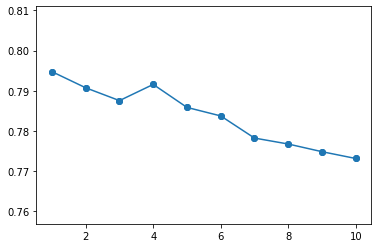

In [196]:
plt.scatter(range(1,11),s)
plt.plot(range(1,11),s, '-o')
plt.show()

In [200]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
dt_tree = tree.fit(X_train, y_train)
dt_tree

DecisionTreeClassifier(max_depth=4, random_state=0)

In [201]:
tree.score(X_train, y_train)

0.8091487428052105

In [202]:
tree.score(X_test, y_test)

0.7915194346289752

In [204]:
#决策树可视化
from sklearn.tree import export_graphviz
import graphviz
export_graphviz(tree, out_file = r'.\Tree_outcome\tree_eply.dot', class_names = ['housewife_yes','housewife_no'], feature_names = X.columns[0:], impurity=False, filled=True)
with open( r'.\Tree_outcome\tree_eply.dot') as f:
    dot_graph=f.read()
graph=graphviz.Source(dot_graph)
graph.render( r'.\Tree_outcome\tree_eply') #输出'tree.pdf'


'.\\Tree_outcome\\tree_eply.pdf'

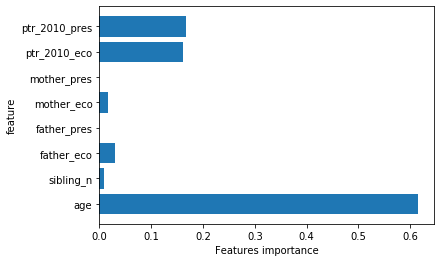

In [151]:
#特征重要性可视化
def plot_feature_importance(model): #定义一个可以展示特征重要性的绘图函数
    n_features = X.shape[1]  
    plt.barh(range(n_features), model.feature_importances_, align='center')#绘制条形图，条形高度这个参数为模型的特征重要性
    plt.yticks(range(n_features), X.columns) #定义y轴刻度值，x轴特殊未定义，显示数字刻度
    plt.xlabel('Features importance') #x轴标签
    plt.ylabel('feature') #y轴标签
plot_feature_importance(tree)
plt.show() #展示图片

### 4.2 影响是否为管理职位的因素

In [205]:
df = df_emply.iloc[:,1:]
s = df_f['if_lead_2018']
df = pd.concat([df,s], axis=1, join='inner')
df_lead = df[(df['if_lead_2018']==0)|(df['if_lead_2018']==1)]

In [206]:
X = df_lead.iloc[:,0:-1]
y = df_lead.if_lead_2018

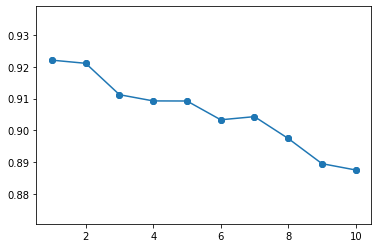

In [207]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
s = []
for i in range(10):
    tree = DecisionTreeClassifier(max_depth=i+1, random_state=0)
    score = cross_val_score(tree, X, y, cv=10, scoring='accuracy')
    s.append(np.mean(score))
plt.scatter(range(1,11),s)
plt.plot(range(1,11),s, '-o')
plt.show()


In [208]:
tree = DecisionTreeClassifier(max_depth=2, random_state=0)
dt_tree = tree.fit(X_train, y_train)
dt_tree
tree.score(X_train, y_train)


0.926657263751763

In [209]:
tree.score(X_test, y_test)

0.9114754098360656

In [210]:
#决策树可视化
from sklearn.tree import export_graphviz
import graphviz
export_graphviz(tree, out_file = r'.\Tree_outcome\tree_lead.dot', class_names = ['leader_no','leader_yes'], feature_names = X.columns[0:], impurity=False, filled=True)
with open( r'.\Tree_outcome\tree_lead.dot') as f:
    dot_graph=f.read()
graph=graphviz.Source(dot_graph)
graph.render( r'.\Tree_outcome\tree_lead') #输出'tree.pdf'

'.\\Tree_outcome\\tree_lead.pdf'

## n. 一些其他探索

### n.1 sibling个数 & 职业威望

In [61]:
df_f.columns

Index(['gender', 'age', 'employ', 'itn_0_2018', '1st_0_2018', 'mj_0_2018',
       'itn_1_2018', '1st_1_2018', 'mj_1_2018', 'if_lead_2018', 'lead_0_2018',
       '1st_ptr_2018', 'now_ptr_2018', 'itn_isco_2018', 'itn_isei_2018',
       'itn_siops_2018', '1st_isco_2018', '1st_isei_2018', '1st_siops_2018',
       'mj_isco_2018', 'mj_isei_2018', 'mj_siops_2018', 'mj_egp_2018',
       'age_2010', 'sibling_n', 'father_1', 'mother_1'],
      dtype='object')

In [65]:
d = df_f[(df_f.age_2010.isna()==False)&(df_f.age.isna()==False)]

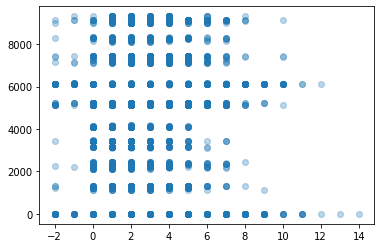

In [69]:
#sibling-isco 职业
plt.scatter(d.sibling_n, d.mj_isco_2018, alpha=0.3)

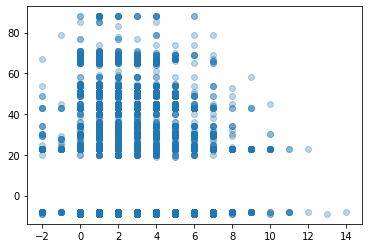

In [70]:
#sibling-isei 社会经济地位
plt.scatter(d.sibling_n, d.mj_isei_2018, alpha=0.3)

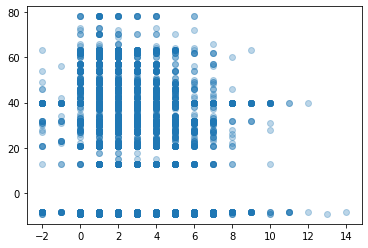

In [71]:
#sibling-siops 声望
plt.scatter(d.sibling_n, d.mj_siops_2018, alpha=0.3)

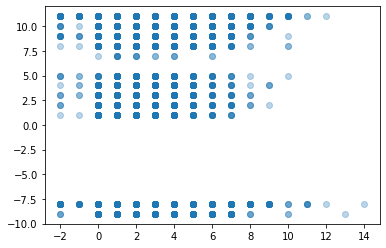

In [72]:
#sibling-egp 阶级
plt.scatter(d.sibling_n, d.mj_egp_2018, alpha=0.3)

### n.2 父母职业 & 子女职业

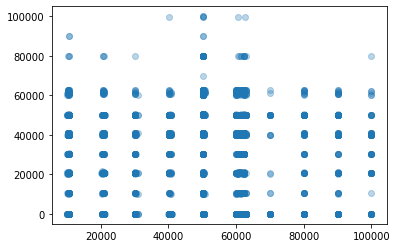

In [75]:
plt.scatter(d.father_1, d.mj_1_2018, alpha=0.3)